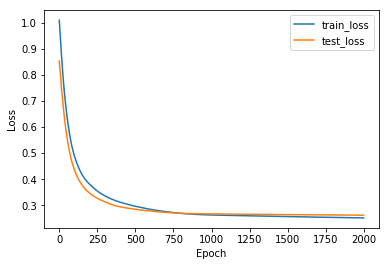

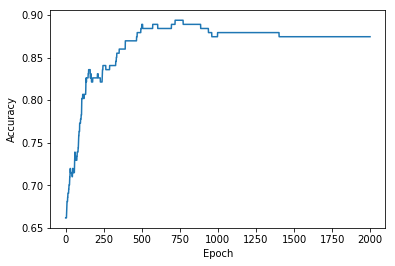

In [1]:
import numpy as np
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt
from sklearn import datasets,model_selection

def data_loader(file):
    X,Y = datasets.load_svmlight_file(file)
    one = np.ones((X.shape[0],1))
    X = hstack( [X, csr_matrix(one)] ).toarray()
    Y = np.array(Y).reshape(X.shape[0],1)
    return X, Y

def train(X_train, Y_train, theta, learning_rate, C=1):
    index =  (1 - Y_train * X_train.dot(theta) < 0)
    Y = Y_train.copy()
    Y[index] = 0
    epsilon_gredient = -np.dot(X_train.transpose(), Y)  
    gredient = theta + C * epsilon_gredient
    theta -= learning_rate*gredient
    return theta

def loss_f(X, Y, theta, C=1):
    epsilon_loss = 1 - Y * X.dot(theta)
    epsilon_loss[epsilon_loss<0] = 0
    loss = 0.5 * np.dot(theta.transpose(), theta).sum() + C*epsilon_loss.sum()
    return loss/X.shape[0]


def accuracy_f(X, Y, theta, threshold=0):
    Y_prediction = X.dot(theta)
    Y_prediction[Y_prediction<threshold] = -1
    Y_prediction[Y_prediction>=threshold] = 1

    classification = Y*Y_prediction
    classification[classification==-1] = 0
    accuracy = classification.sum()/classification.shape[0]
    return accuracy

if __name__ =="__main__":
    learning_rate = 0.00003
    C = 0.8
    epoch = 2000
    threshold=0
    X,Y = data_loader('australian.txt')
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3,random_state=42)
    theta = np.random.random((X.shape[1],1))
    List1 = []
    List2 = []
    List_accuracy =[]
    for t in range(epoch):
        theta = train(X_train, Y_train, theta, learning_rate, C)
        loss1 = loss_f(X_train, Y_train, theta, C)
        List1.append(loss1)
        loss2 = loss_f(X_test, Y_test, theta, C)
        List2.append(loss2)
        accuracy = accuracy_f(X_test, Y_test, theta, threshold)
        List_accuracy.append(accuracy)
    figure1 = plt.figure(1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(List1, label="train_loss")
    plt.plot(List2, label="test_loss")
    plt.legend(loc='upper right')

    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(List_accuracy)
    plt.show()

